In [28]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.fft import fft, ifft
from scipy.signal import firwin, lfilter
from scipy import signal

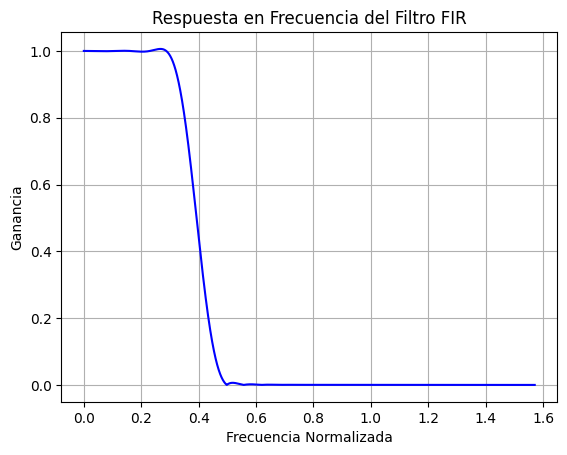

In [29]:
# Definir las especificaciones del filtro
frecuencia_corte = 0.25  # Normalizada (0.5 corresponde a la frecuencia de Nyquist)
num_coeficientes = 51   # Número de coeficientes (impares para un filtro simétrico)
tipo_ventana = 'hann'  # Tipo de ventana

# Calcular los coeficientes del filtro
coeficientes = firwin(num_coeficientes, frecuencia_corte, window=tipo_ventana)
ventana = signal.get_window('hann',num_coeficientes) # Ventana hamming

n_size = 512
H = fft(coeficientes, n= n_size)
H_ =  (20*np.log((np.abs(H)))/2)[0:int(n_size/2)]

fh = np.arange(0,1,1/int(n_size/2))

fs = 1000  # Frecuencia de muestreo en Hz

# Generar la señal de entrada
t = np.arange(0, 1.0, 1/fs)  # 1 segundo de duración
f1 = 50   # Frecuencia dentro de la banda de paso
f2 = 300  # Frecuencia dentro de la banda de rechazo
senal = np.sin(2 * np.pi * f1 * t) + np.sin(2 * np.pi * f2 * t)

# Aplicar el filtro a los datos
# Supongamos que 'datos' es un array de numpy con tus datos
datos_filtrados = lfilter(coeficientes, 1.0, senal)

# Visualizar la respuesta del filtro
f, h = signal.freqz(coeficientes, worN=8000)
plt.plot(0.5*np.pi*f/np.pi, np.abs(h), 'b')
plt.title('Respuesta en Frecuencia del Filtro FIR')
plt.xlabel('Frecuencia Normalizada')
plt.ylabel('Ganancia')
plt.grid()
plt.show()

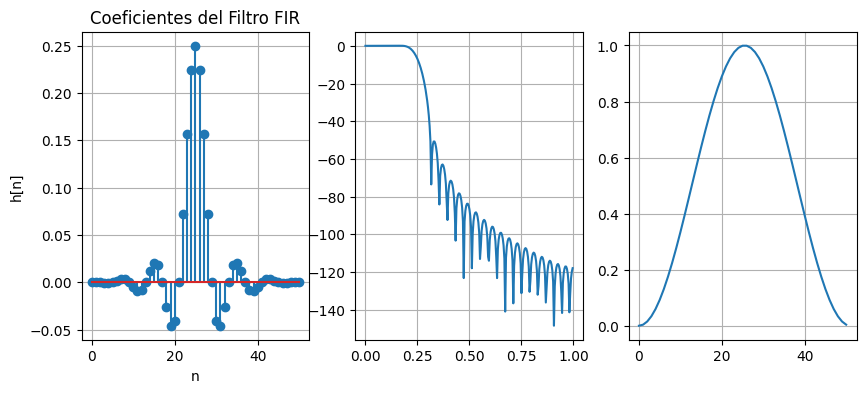

In [30]:
# Visualización de los coeficientes
plt.figure(figsize=(10, 4))

plt.subplot(1,3,1)
plt.stem(coeficientes)
plt.title('Coeficientes del Filtro FIR')
plt.xlabel('n')
plt.ylabel('h[n]')
plt.grid()
plt.subplot(1,3,2)
plt.plot(fh,H_)
plt.grid()
plt.subplot(1,3,3)
plt.plot(ventana)
plt.grid()

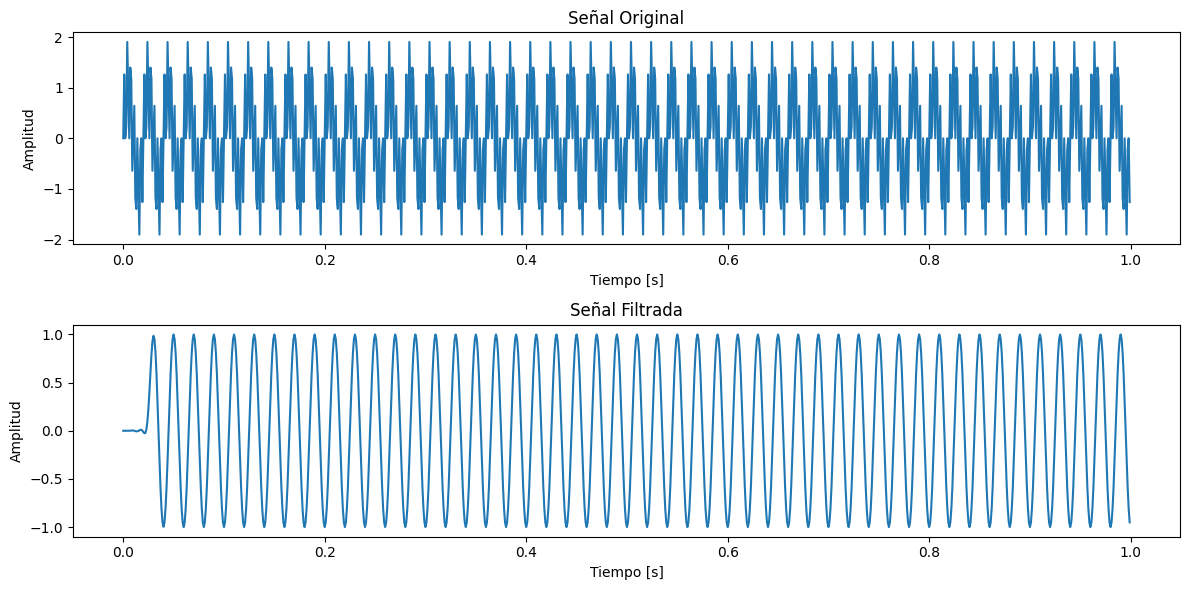

In [31]:
# Visualización
plt.figure(figsize=(12, 6))

# Señal original
plt.subplot(2, 1, 1)
plt.plot(t, senal)
plt.title('Señal Original')
plt.xlabel('Tiempo [s]')
plt.ylabel('Amplitud')

# Señal filtrada
plt.subplot(2, 1, 2)
plt.plot(t, datos_filtrados)
plt.title('Señal Filtrada')
plt.xlabel('Tiempo [s]')
plt.ylabel('Amplitud')

plt.tight_layout()
plt.show()

In [32]:
print(coeficientes)

[ 0.00000000e+00 -3.84098988e-20 -1.53671668e-04 -5.07848334e-04
 -6.62652908e-04  9.30292969e-19  1.60481554e-03  3.20479840e-03
  3.07178137e-03 -2.79707341e-18 -5.18245171e-03 -9.23491543e-03
 -8.11059055e-03  5.17693469e-18  1.21438580e-02  2.08266510e-02
  1.78225134e-02 -7.48113092e-18 -2.63161447e-02 -4.58469044e-02
 -4.07035041e-02  9.13963473e-18  7.23677237e-02  1.56602224e-01
  2.24116327e-01  2.49915983e-01  2.24116327e-01  1.56602224e-01
  7.23677237e-02  9.13963473e-18 -4.07035041e-02 -4.58469044e-02
 -2.63161447e-02 -7.48113092e-18  1.78225134e-02  2.08266510e-02
  1.21438580e-02  5.17693469e-18 -8.11059055e-03 -9.23491543e-03
 -5.18245171e-03 -2.79707341e-18  3.07178137e-03  3.20479840e-03
  1.60481554e-03  9.30292969e-19 -6.62652908e-04 -5.07848334e-04
 -1.53671668e-04 -3.84098988e-20  0.00000000e+00]


C:\Users\fabian.castano\AppData\Local\Temp\ipykernel_7108\2081807316.py:2: RuntimeWarning: invalid value encountered in divide
  return np.where(x == 0, 1, np.sin(np.pi * x) / (np.pi * x))


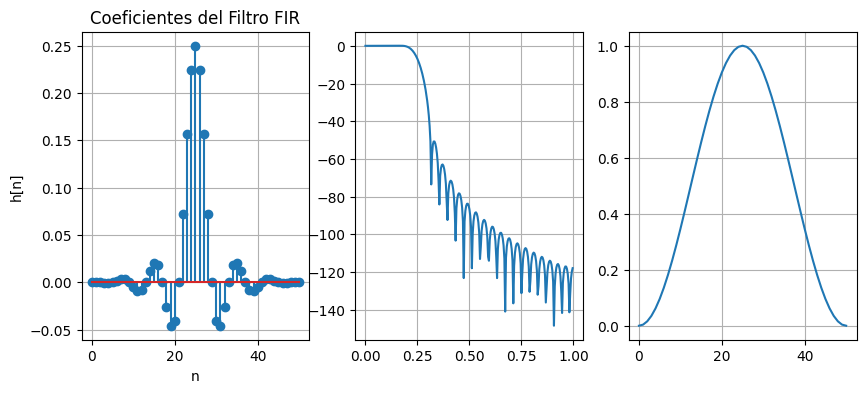

In [33]:
def sinc(x):
    return np.where(x == 0, 1, np.sin(np.pi * x) / (np.pi * x))

def ideal_lowpass(fc, N):
    n = np.arange(N)
    return 2 * fc * sinc(2 * fc * (n - (N - 1) / 2))

def hanning_window(N):
    n = np.arange(N)
    return 0.5 - 0.5 * np.cos(2 * np.pi * n / (N - 1))

# Parámetros del filtro
fc_real = 0.25  # Frecuencia de corte normalizada
N = 51     # Número de coeficientes
fc = fc_real/2

# Cálculo de los coeficientes
coeficientes_ideal = ideal_lowpass(fc, N)
ventana = hanning_window(N)
coeficientes_s = coeficientes_ideal * ventana

n_size = 512
H = fft(coeficientes_s, n= n_size)
H_ =  (20*np.log((np.abs(H)))/2)[0:int(n_size/2)]

fh = np.arange(0,1,1/int(n_size/2))

# Visualización de los coeficientes
plt.figure(figsize=(10, 4))

plt.subplot(1,3,1)
plt.stem(coeficientes_s)
plt.title('Coeficientes del Filtro FIR')
plt.xlabel('n')
plt.ylabel('h[n]')
plt.grid()
plt.subplot(1,3,2)
plt.plot(fh,H_)
plt.grid()
plt.subplot(1,3,3)
plt.plot(ventana)
plt.grid()


plt.show()

[ 0.00000000e+00 -3.84098988e-20 -1.53671668e-04 -5.07848334e-04
 -6.62652908e-04  9.30292969e-19  1.60481554e-03  3.20479840e-03
  3.07178137e-03 -2.79707341e-18 -5.18245171e-03 -9.23491543e-03
 -8.11059055e-03  5.17693469e-18  1.21438580e-02  2.08266510e-02
  1.78225134e-02 -7.48113092e-18 -2.63161447e-02 -4.58469044e-02
 -4.07035041e-02  9.13963473e-18  7.23677237e-02  1.56602224e-01
  2.24116327e-01  2.49915983e-01  2.24116327e-01  1.56602224e-01
  7.23677237e-02  9.13963473e-18 -4.07035041e-02 -4.58469044e-02
 -2.63161447e-02 -7.48113092e-18  1.78225134e-02  2.08266510e-02
  1.21438580e-02  5.17693469e-18 -8.11059055e-03 -9.23491543e-03
 -5.18245171e-03 -2.79707341e-18  3.07178137e-03  3.20479840e-03
  1.60481554e-03  9.30292969e-19 -6.62652908e-04 -5.07848334e-04
 -1.53671668e-04 -3.84098988e-20  0.00000000e+00]
[ 0.00000000e+00 -3.84228115e-20 -1.53723330e-04 -5.08019063e-04
 -6.62875680e-04  9.30605716e-19  1.60535505e-03  3.20587579e-03
  3.07281404e-03 -2.79801374e-18 -5.1841

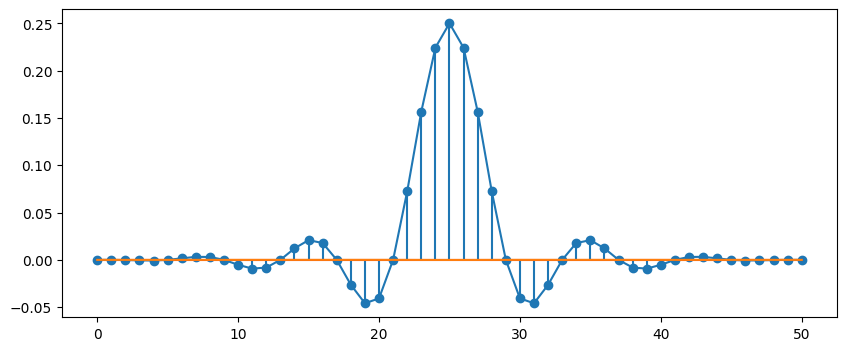

In [39]:
print(coeficientes)
print(coeficientes_s)

print(coeficientes - coeficientes_s)

plt.figure(figsize=(10,4))
plt.stem(coeficientes)
plt.plot(coeficientes_s)
plt.plot(coeficientes - coeficientes_s)

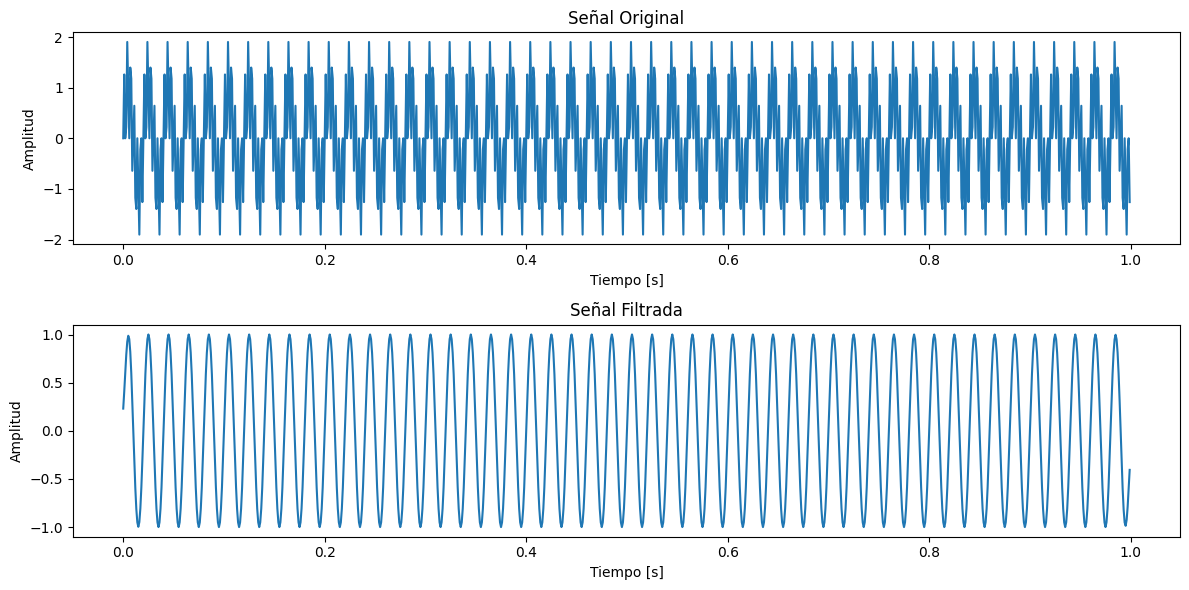

In [35]:
fs = 1000  # Frecuencia de muestreo en Hz

# Generar la señal de entrada
t = np.arange(0, 1.0, 1/fs)  # 1 segundo de duración
f1 = 50   # Frecuencia dentro de la banda de paso
f2 = 300  # Frecuencia dentro de la banda de rechazo
senal = np.sin(2 * np.pi * f1 * t) + np.sin(2 * np.pi * f2 * t)

# Aplicar el filtro
senal_filtrada = np.convolve(senal, coeficientes_s, mode='same')

# Visualización
plt.figure(figsize=(12, 6))

# Señal original
plt.subplot(2, 1, 1)
plt.plot(t, senal)
plt.title('Señal Original')
plt.xlabel('Tiempo [s]')
plt.ylabel('Amplitud')

# Señal filtrada
plt.subplot(2, 1, 2)
plt.plot(t, senal_filtrada)
plt.title('Señal Filtrada')
plt.xlabel('Tiempo [s]')
plt.ylabel('Amplitud')

plt.tight_layout()
plt.show()

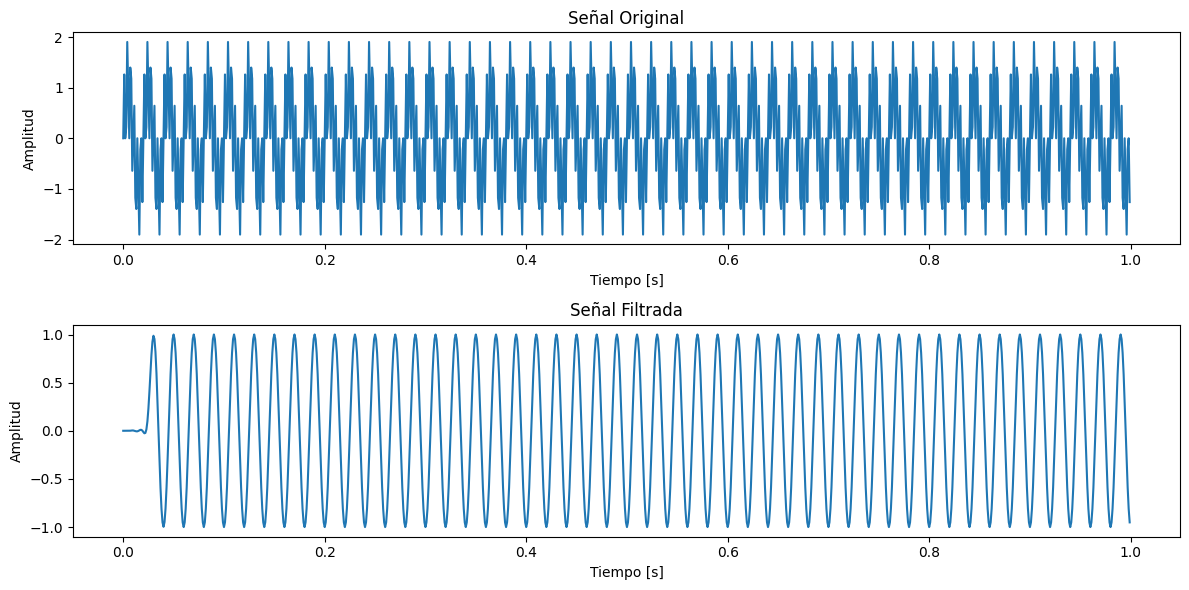

In [36]:
def aplicar_filtro_fir(senal, coeficientes):
    N = len(coeficientes)
    senal_filtrada = np.zeros_like(senal)

    # Aplicar la ecuación en diferencias
    for n in range(len(senal)):
        for k in range(N):
            if n - k >= 0:  # Asegurarse de que el índice no sea negativo
                senal_filtrada[n] += coeficientes[k] * senal[n - k]

    return senal_filtrada

# Aplicar el filtro a la señal
senal_filtrada = aplicar_filtro_fir(senal, coeficientes_s)

# Visualización
plt.figure(figsize=(12, 6))

# Señal original
plt.subplot(2, 1, 1)
plt.plot(t, senal)
plt.title('Señal Original')
plt.xlabel('Tiempo [s]')
plt.ylabel('Amplitud')

# Señal filtrada
plt.subplot(2, 1, 2)
plt.plot(t, senal_filtrada)
plt.title('Señal Filtrada')
plt.xlabel('Tiempo [s]')
plt.ylabel('Amplitud')

plt.tight_layout()
plt.show()

C:\Users\fabian.castano\AppData\Local\Temp\ipykernel_7108\503678663.py:3: RuntimeWarning: invalid value encountered in divide
  return np.where(x == 0, 1, np.sin(np.pi * x) / (np.pi * x))


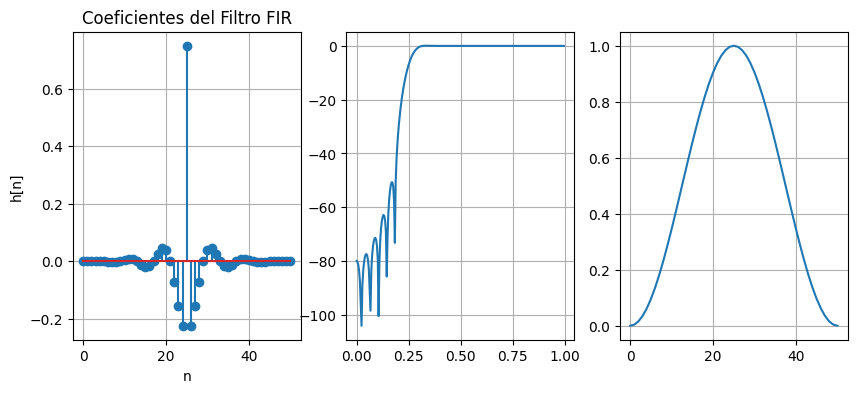

In [42]:
# Funciones previamente definidas
def sinc(x):
    return np.where(x == 0, 1, np.sin(np.pi * x) / (np.pi * x))

def ideal_lowpass(fc, N):
    n = np.arange(N)
    return 2 * fc * sinc(2 * fc * (n - (N - 1) / 2))

def hanning_window(N):
    n = np.arange(N)
    return 0.5 - 0.5 * np.cos(2 * np.pi * n / (N - 1))

# Convertir a filtro pasa altas mediante inversión espectral
def convert_to_highpass(coeficientes):
    coeficientes_highpass = -coeficientes
    centro = len(coeficientes) // 2
    coeficientes_highpass[centro] += 1
    return coeficientes_highpass

# Parámetros del filtro
fc_real = 0.25  # Frecuencia de corte normalizada
N = 51     # Número de coeficientes
fc = fc_real/2

# Cálculo de los coeficientes para el filtro paso bajo
coeficientes_lp = ideal_lowpass(fc, N)
ventana = hanning_window(N)
coeficientes_lp = coeficientes_lp * ventana

# Convertir a filtro pasa altas
coeficientes_hp = convert_to_highpass(coeficientes_lp)


n_size = 512
H = fft(coeficientes_hp, n= n_size)
H_ =  (20*np.log((np.abs(H)))/2)[0:int(n_size/2)]

fh = np.arange(0,1,1/int(n_size/2))

# Visualización de los coeficientes
plt.figure(figsize=(10, 4))

plt.subplot(1,3,1)
plt.stem(coeficientes_hp)
plt.title('Coeficientes del Filtro FIR')
plt.xlabel('n')
plt.ylabel('h[n]')
plt.grid()
plt.subplot(1,3,2)
plt.plot(fh,H_)
plt.grid()
plt.subplot(1,3,3)
plt.plot(ventana)
plt.grid()

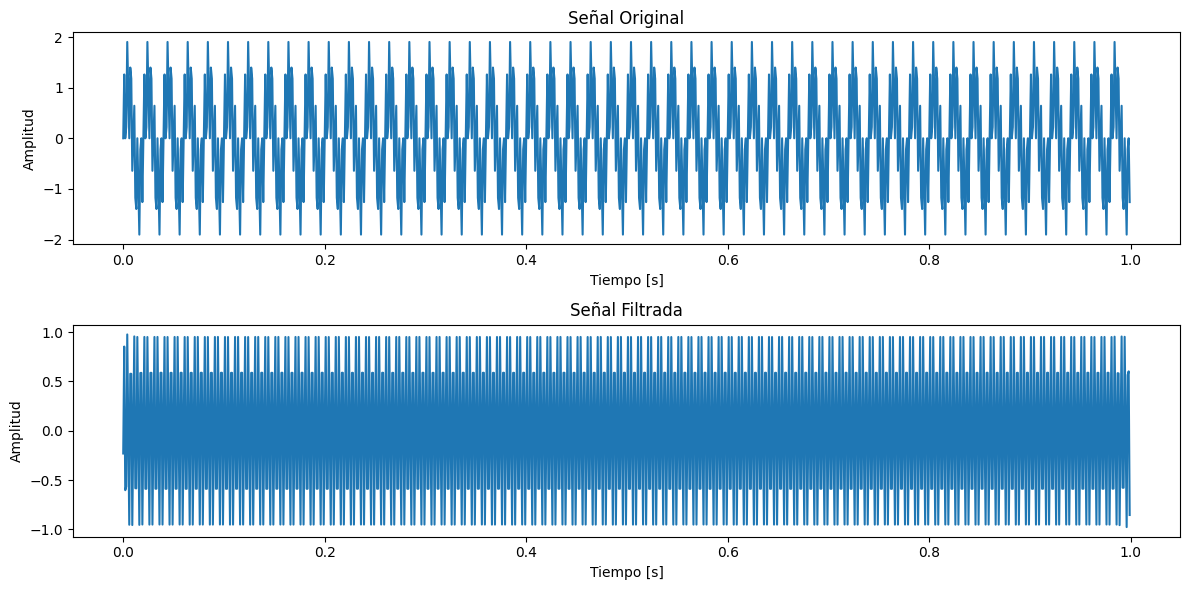

In [46]:
fs = 1000  # Frecuencia de muestreo en Hz

# Generar la señal de entrada
t = np.arange(0, 1.0, 1/fs)  # 1 segundo de duración
f1 = 50   # Frecuencia dentro de la banda de paso
f2 = 300  # Frecuencia dentro de la banda de rechazo
senal = np.sin(2 * np.pi * f1 * t) + np.sin(2 * np.pi * f2 * t)

# Aplicar el filtro
senal_filtrada = np.convolve(senal, coeficientes_hp, mode='same')

# Visualización
plt.figure(figsize=(12, 6))

# Señal original
plt.subplot(2, 1, 1)
plt.plot(t, senal)
plt.title('Señal Original')
plt.xlabel('Tiempo [s]')
plt.ylabel('Amplitud')

# Señal filtrada
plt.subplot(2, 1, 2)
plt.plot(t, senal_filtrada)
plt.title('Señal Filtrada')
plt.xlabel('Tiempo [s]')
plt.ylabel('Amplitud')

plt.tight_layout()
plt.show()

C:\Users\fabian.castano\AppData\Local\Temp\ipykernel_7108\2898469263.py:2: RuntimeWarning: invalid value encountered in divide
  return np.where(x == 0, 1, np.sin(np.pi * x) / (np.pi * x))


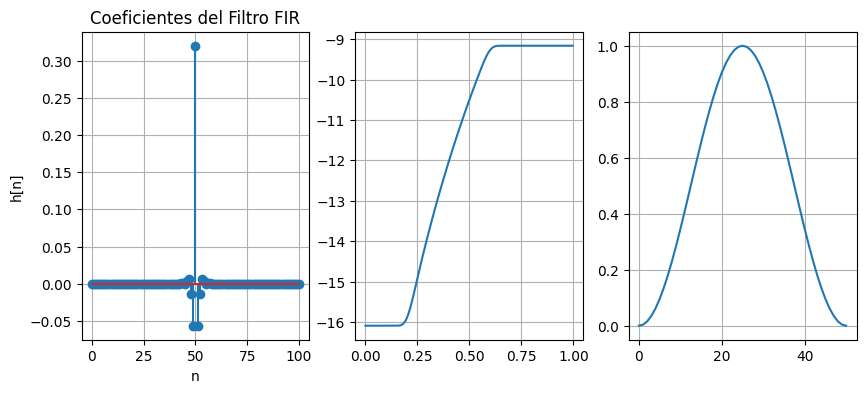

In [49]:
def sinc(x):
    return np.where(x == 0, 1, np.sin(np.pi * x) / (np.pi * x))

def ideal_filter(fc, N, tipo='paso_bajo'):
    n = np.arange(N)
    h = 2 * fc * sinc(2 * fc * (n - (N - 1) / 2))
    
    if tipo == 'paso_alto':
        h = -h
        h[N // 2] += 1

    return h

def hanning_window(N):
    n = np.arange(N)
    return 0.5 - 0.5 * np.cos(2 * np.pi * n / (N - 1))

# Parámetros del filtro
fc1 = 0.2/2   # Frecuencia de corte baja normalizada
fc2 = 0.4/2   # Frecuencia de corte alta normalizada
N = 101     # Número de coeficientes

# Cálculo de los coeficientes para los filtros paso bajo y paso alto
coeficientes_lp = ideal_filter(fc2, N, 'paso_bajo') * hanning_window(N)
coeficientes_hp = ideal_filter(fc1, N, 'paso_alto') * hanning_window(N)

# Combinar los filtros para crear un filtro pasa banda
coeficientes_bp = coeficientes_lp * coeficientes_hp

n_size = 512
H = fft(coeficientes_bp, n= n_size)
H_ =  (20*np.log((np.abs(H)))/2)[0:int(n_size/2)]

fh = np.arange(0,1,1/int(n_size/2))

# Visualización de los coeficientes
plt.figure(figsize=(10, 4))

plt.subplot(1,3,1)
plt.stem(coeficientes_bp)
plt.title('Coeficientes del Filtro FIR')
plt.xlabel('n')
plt.ylabel('h[n]')
plt.grid()
plt.subplot(1,3,2)
plt.plot(fh,H_)
plt.grid()
plt.subplot(1,3,3)
plt.plot(ventana)
plt.grid()